In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\EXCELR\Assingments\Answers\KNN\glass.csv")

In [3]:
dataset.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
dataset.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
dataset.duplicated().sum()

1

In [6]:
dataset = dataset.drop_duplicates()

In [7]:
dataset.duplicated().sum()

0

C:\Users\Yash\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


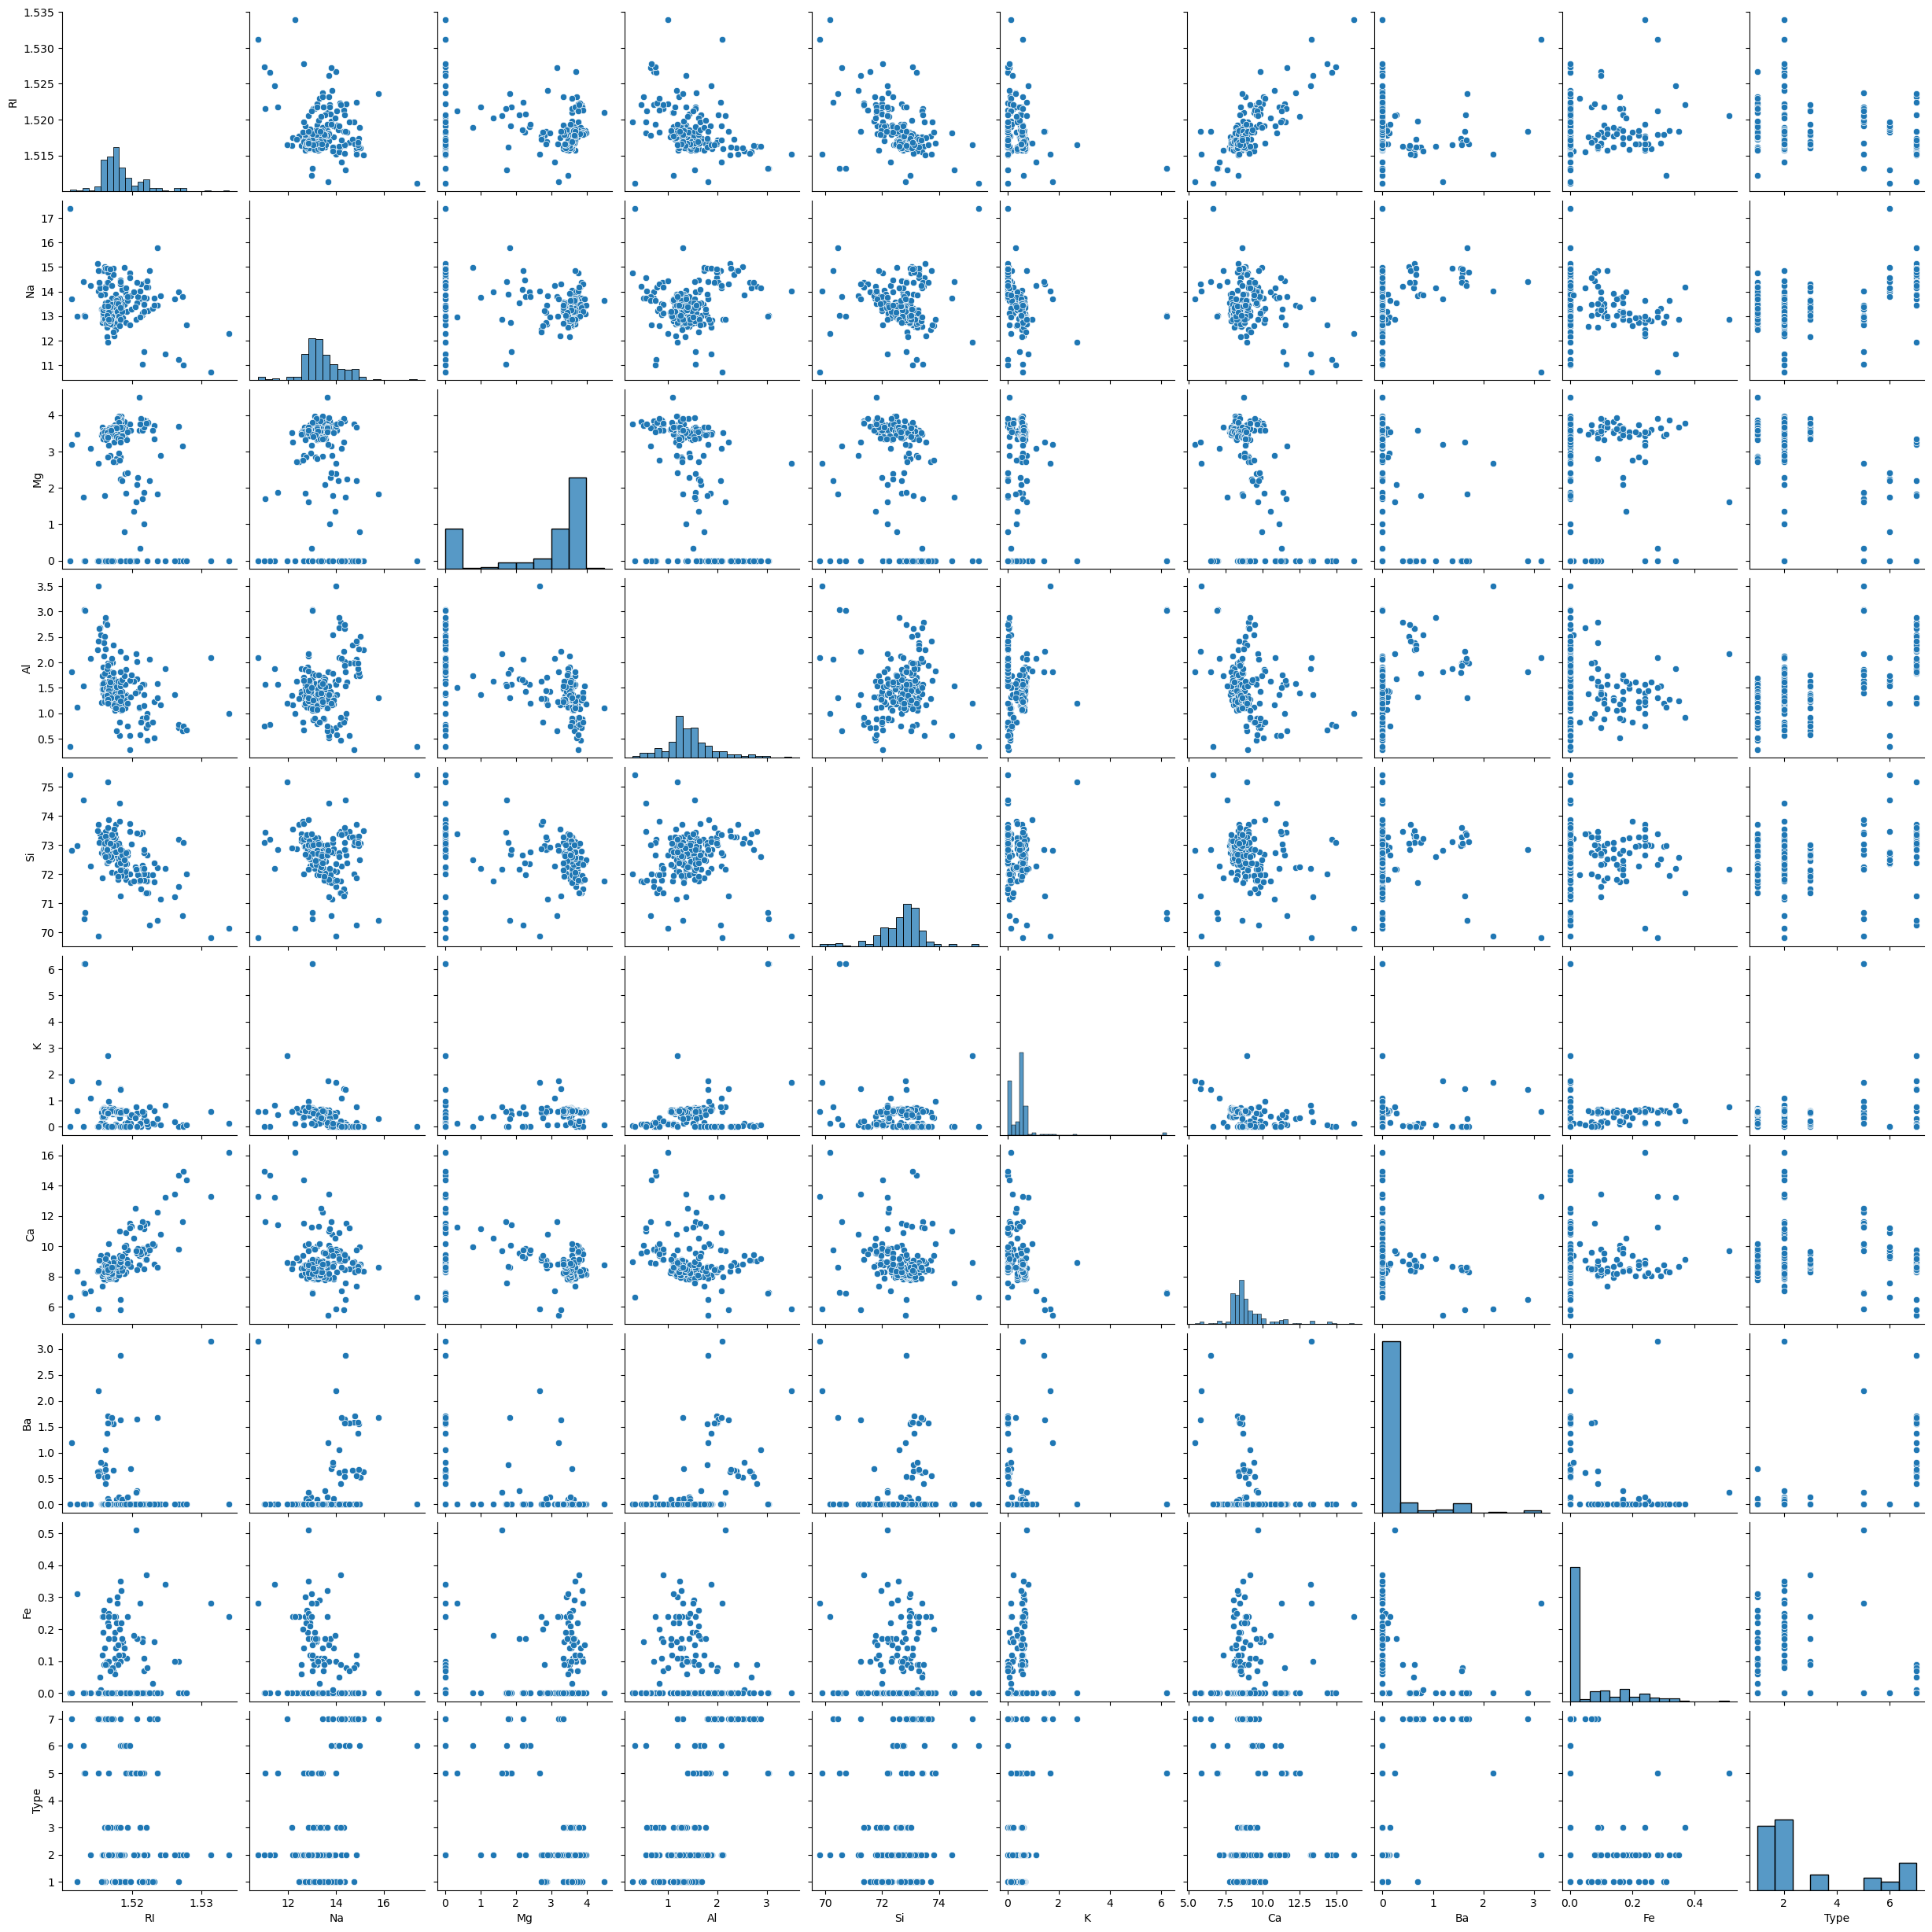

In [8]:
sns.pairplot(dataset)

In [9]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 3]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [7 7]
 [2 2]
 [1 1]
 [2 7]
 [2 1]
 [7 7]
 [1 2]
 [1 1]
 [6 2]
 [2 5]
 [5 5]
 [5 5]
 [1 1]
 [2 3]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [5 5]
 [7 7]
 [2 2]
 [1 1]
 [2 2]
 [3 1]
 [2 1]
 [1 1]
 [1 3]
 [1 1]
 [1 2]
 [7 7]
 [7 7]
 [1 1]
 [2 6]
 [1 1]
 [2 2]
 [1 1]
 [1 1]]


In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred) * 100

[[12  2  1  0  0  0]
 [ 4  9  0  0  1  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  5]]


In [15]:
print("The Accuracy of the model is: ",accuracy)

The Accuracy of the model is:  67.44186046511628


C:\Users\Yash\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


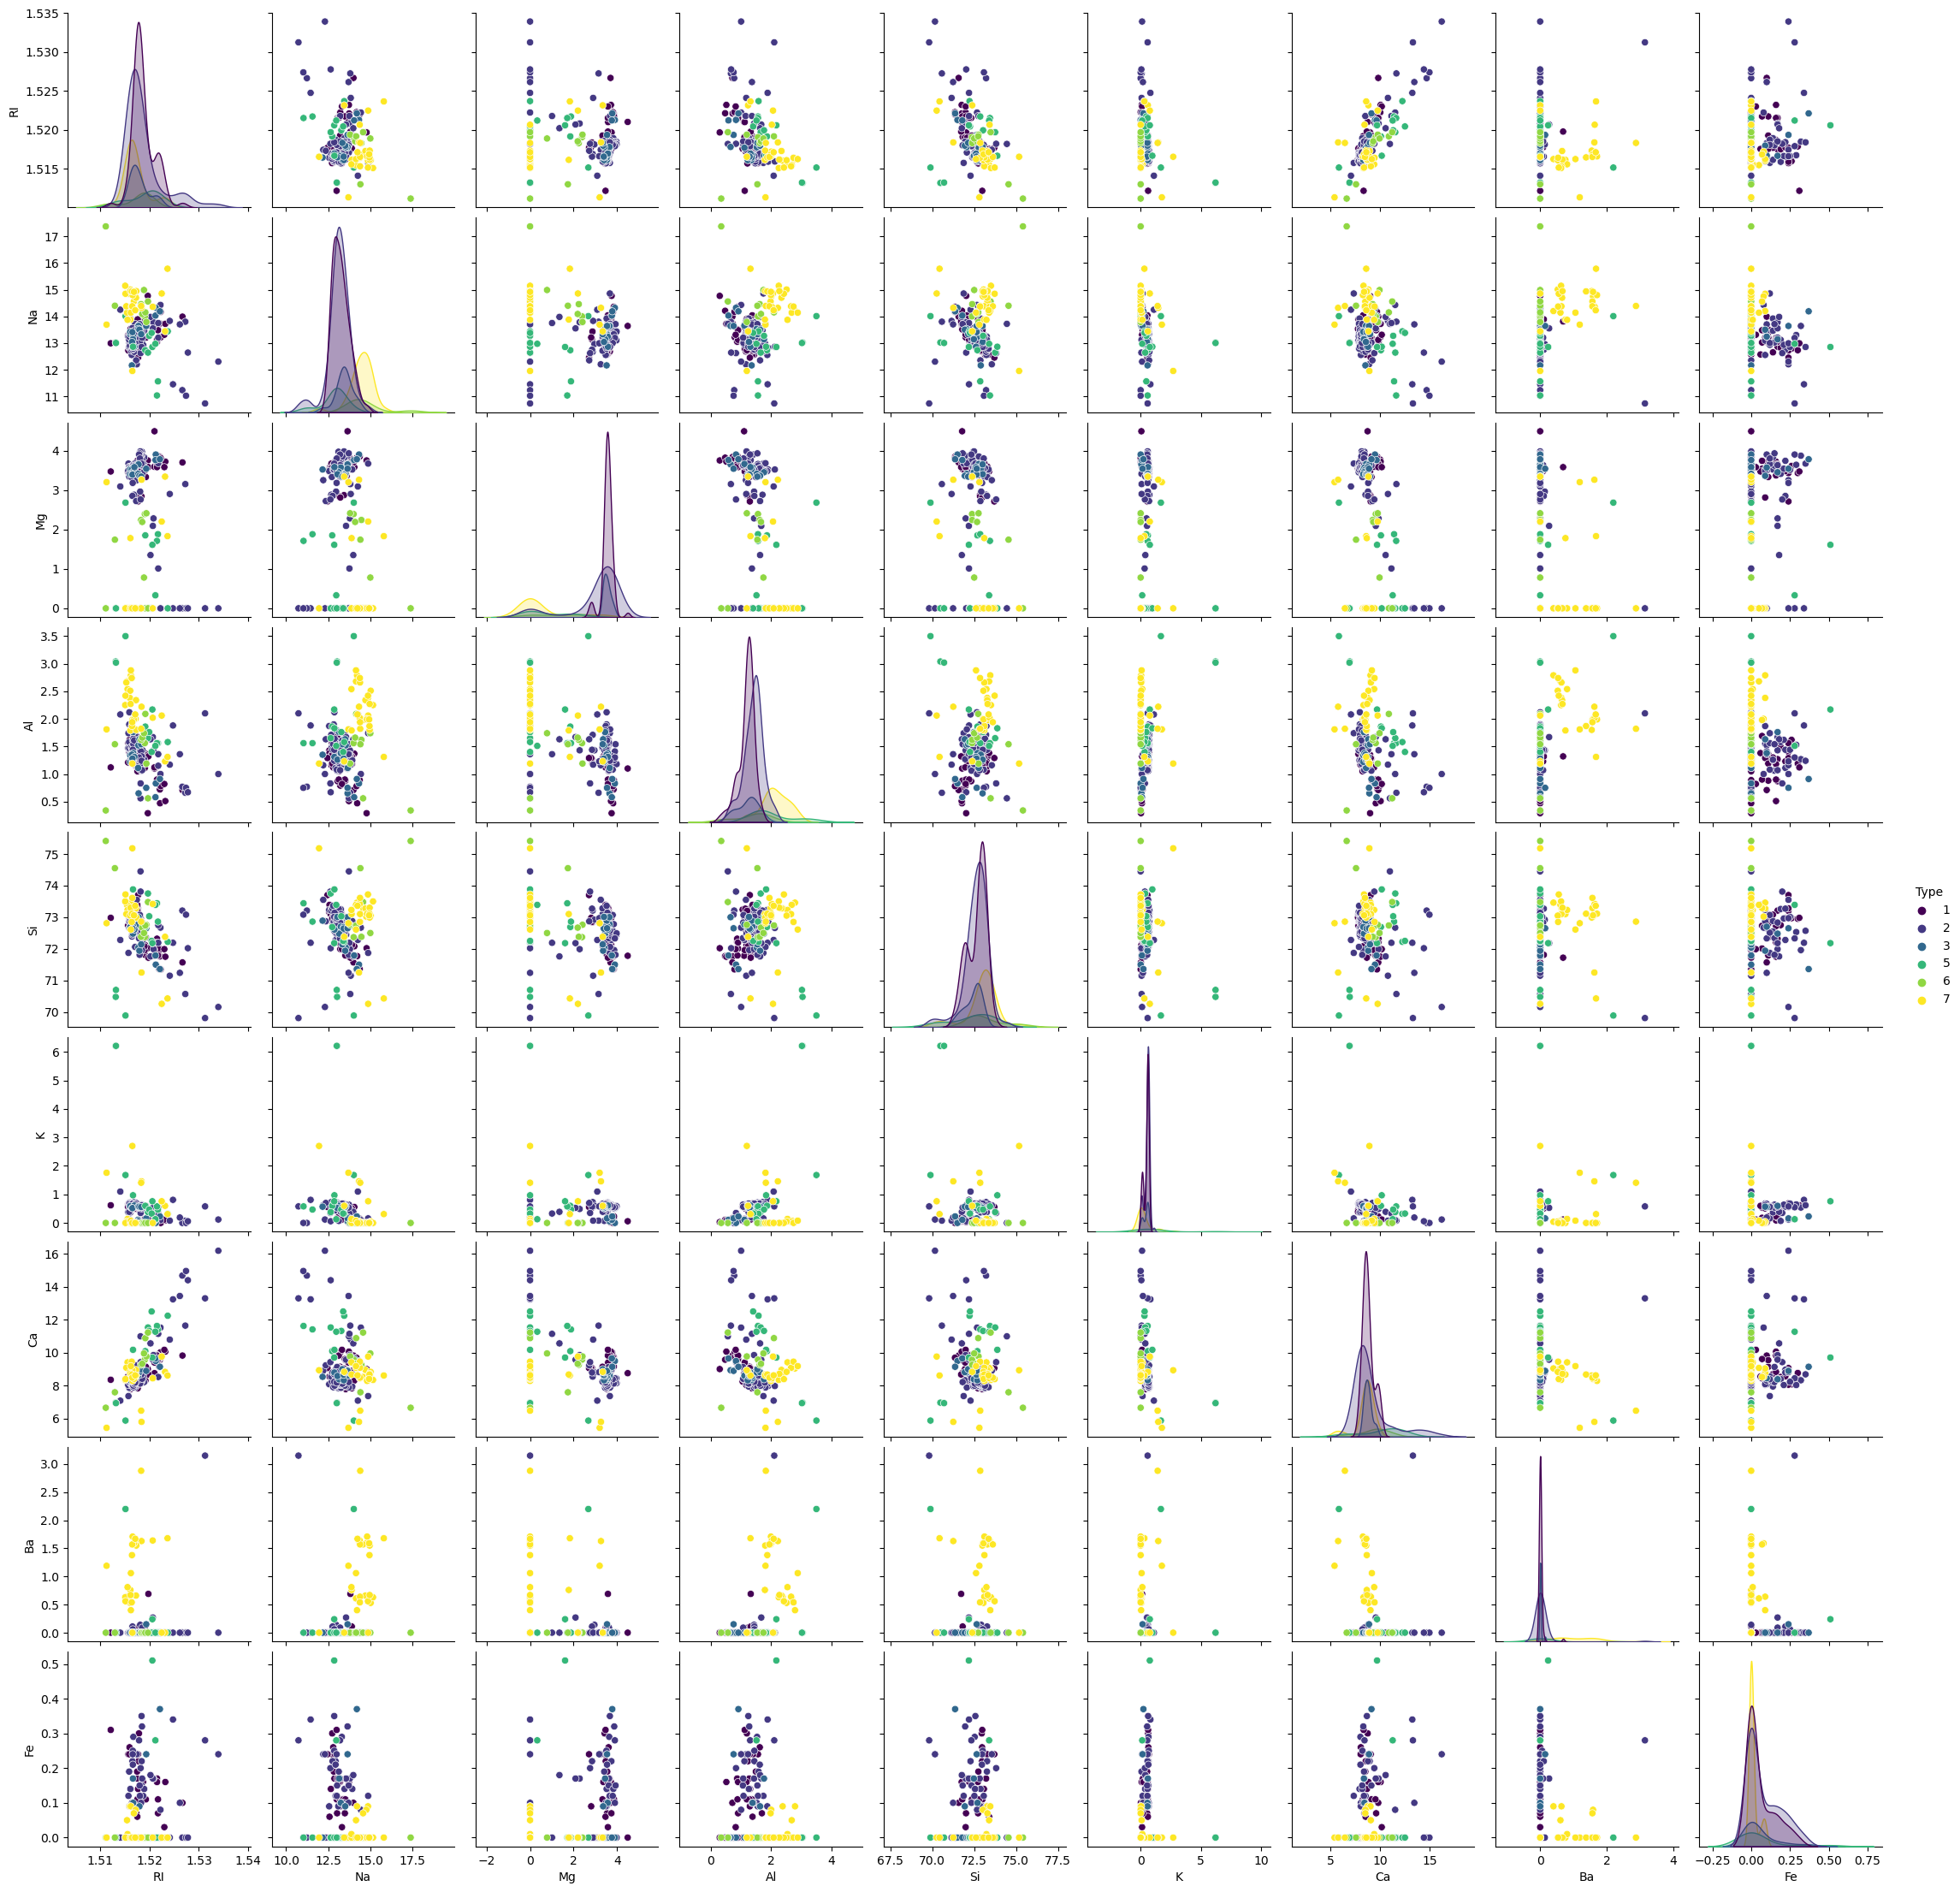

In [16]:
sns.pairplot(dataset, hue='Type', palette='viridis')
plt.show()

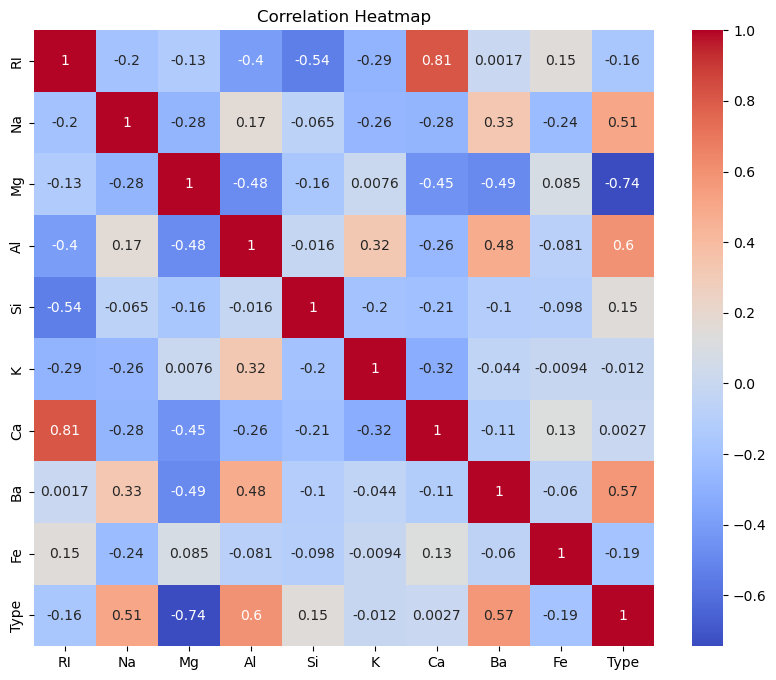

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

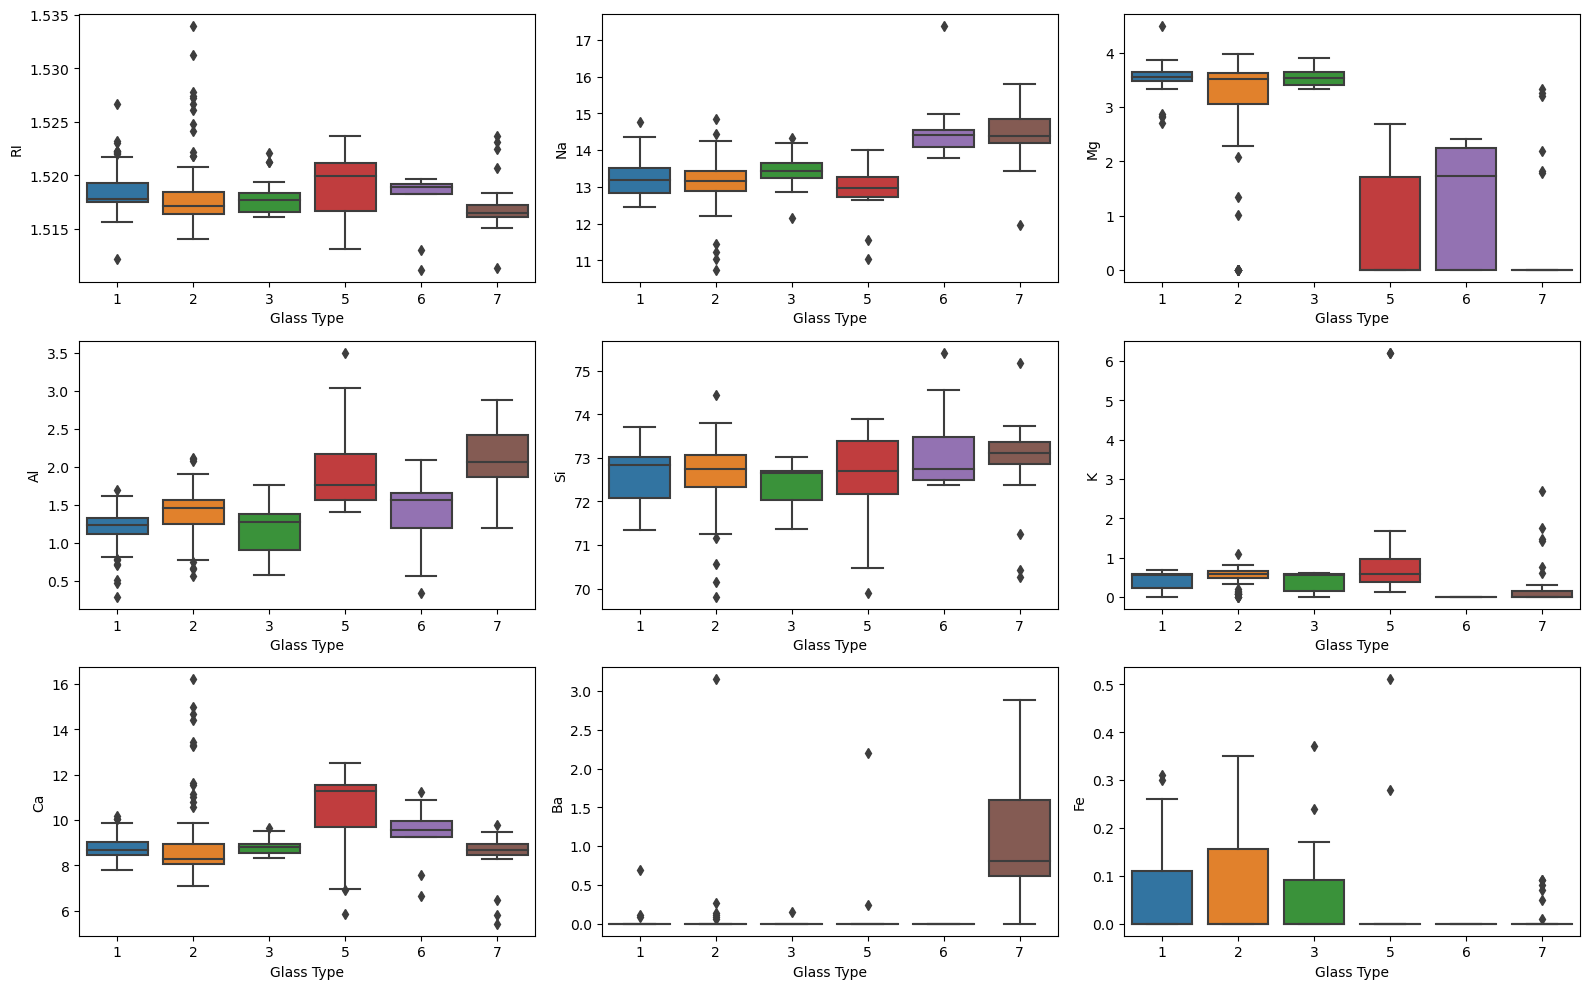

In [18]:
numeric_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.figure(figsize=(16, 10))
for feature in numeric_features:
    plt.subplot(3, 3, numeric_features.index(feature) + 1)
    sns.boxplot(x='Type', y=feature, data=dataset)
    plt.xlabel('Glass Type')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

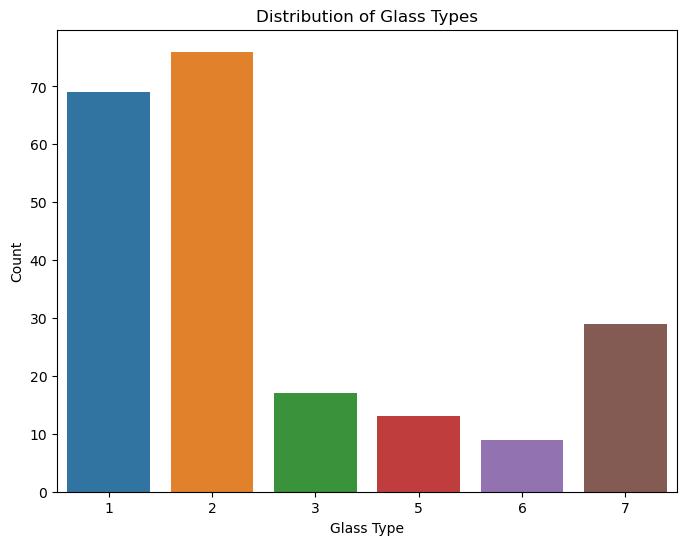

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=dataset)
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Distribution of Glass Types')
plt.show()